Data contents:

UF, Tipo de doença, Local de óbito, Faixa etária, Sexo

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
path_2019 = "..\data\obitos-2019.csv"
path_2020 = "..\data\obitos-2020.csv"
path_2021 = "..\data\obitos-2021.csv"
path_2022 = "..\data\obitos-2022.csv"

In [5]:
data_2019 = pd.read_csv(path_2019)
data_2020 = pd.read_csv(path_2020)
data_2021 = pd.read_csv(path_2021)
data_2022 = pd.read_csv(path_2022)


print(f"data_2019 has {data_2019.shape[0]} rows and {data_2019.shape[1]} columns.")
print(f"data_2020 has {data_2020.shape[0]} rows and {data_2020.shape[1]} columns.")
print(f"data_2021 has {data_2021.shape[0]} rows and {data_2021.shape[1]} columns.")
print(f"data_2022 has {data_2022.shape[0]} rows and {data_2022.shape[1]} columns.")

data_2019 has 12628 rows and 6 columns.
data_2020 has 15417 rows and 6 columns.
data_2021 has 15435 rows and 6 columns.
data_2022 has 13604 rows and 6 columns.


In [6]:
data_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,8
1,AC,OUTRAS,DOMICILIO,< 9,M,16
2,AC,OUTRAS,HOSPITAL,< 9,F,47
3,AC,OUTRAS,HOSPITAL,< 9,M,70
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [7]:
data_2020.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,11
2,AC,OUTRAS,HOSPITAL,< 9,F,65
3,AC,OUTRAS,HOSPITAL,< 9,I,1
4,AC,OUTRAS,HOSPITAL,< 9,M,67


In [8]:
data_2021.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,11
1,AC,OUTRAS,DOMICILIO,< 9,M,21
2,AC,OUTRAS,HOSPITAL,< 9,F,63
3,AC,OUTRAS,HOSPITAL,< 9,I,4
4,AC,OUTRAS,HOSPITAL,< 9,M,57


In [9]:
data_2022.sample(5)



,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
7369,RJ,SEPTICEMIA,VIA_PUBLICA,60 - 69,F,1
3728,AL,INSUFICIENCIA_RESPIRATORIA,OUTRO,40 - 49,M,1
6443,AP,SEPTICEMIA,HOSPITAL,60 - 69,F,16
3655,SP,SEPTICEMIA,VIA_PUBLICA,30 - 39,M,4
10870,TO,SRAG,HOSPITAL,80 - 89,M,1


In [10]:
# Cheking if the number of states is correct
print(len(data_2019["uf"].unique()), len(data_2020["uf"].unique()), len(data_2021["uf"].unique()), len(data_2022["uf"].unique()))

27 27 27 27


TypeError: unhashable type: 'list'

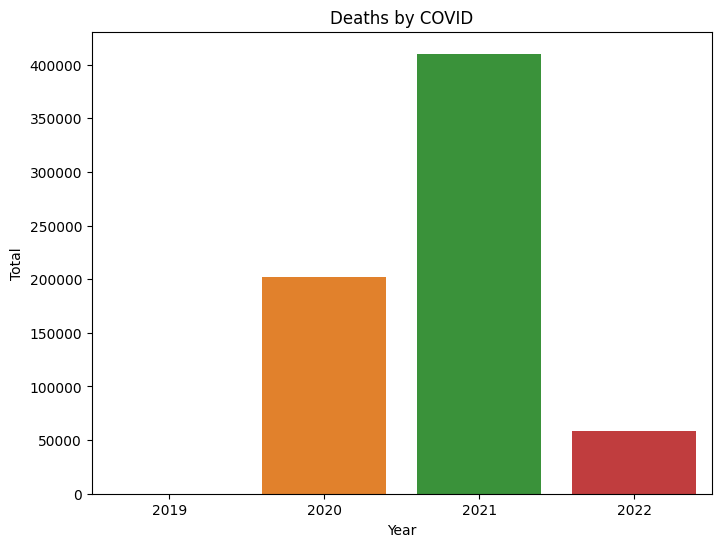

In [25]:
def comparative_chart(cause):
    total_deaths_2019 = data_2019.groupby(['tipo_doenca']).sum()
    total_deaths_2020 = data_2020.groupby(['tipo_doenca']).sum()
    total_deaths_2021 = data_2021.groupby(['tipo_doenca']).sum()
    total_deaths_2022 = data_2022.groupby(['tipo_doenca']).sum()
    list_cause = [int(total_deaths_2019.loc[cause]), int(total_deaths_2020.loc[cause]), int(total_deaths_2021.loc[cause]), int(total_deaths_2022.loc[cause])]
    data_list = pd.DataFrame({'Total': list_cause,
                              'Year': [2019, 2020, 2021, 2022]})

    plt.figure(figsize=(8, 6))
    sns.barplot(x = 'Year', y = 'Total', data = data_list)
    plt.title(f'Deaths by {cause}')
    plt.show()

comparative_chart("COVID")

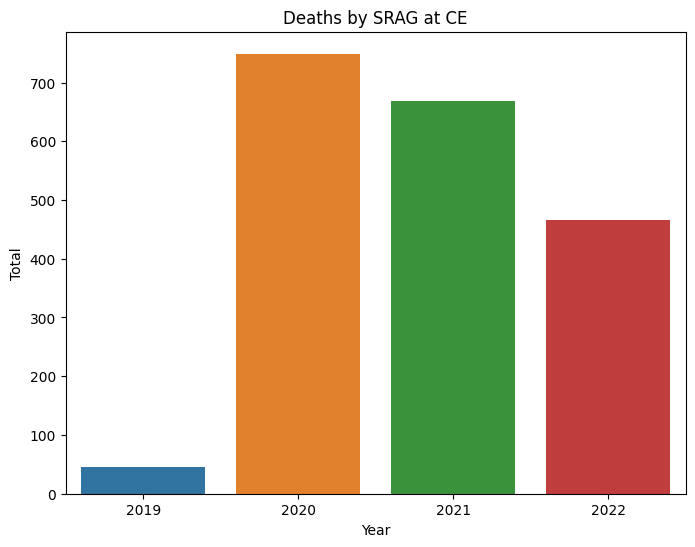

In [36]:
def comparative_chart(state, cause):
    total_deaths_2019 = data_2019.groupby(['uf', 'tipo_doenca']).sum()
    total_deaths_2020 = data_2020.groupby(['uf', 'tipo_doenca']).sum()
    total_deaths_2021 = data_2021.groupby(['uf', 'tipo_doenca']).sum()
    total_deaths_2022 = data_2022.groupby(['uf', 'tipo_doenca']).sum()
    list_cause = [int(total_deaths_2019.loc[state, cause]), int(total_deaths_2020.loc[state, cause]), int(total_deaths_2021.loc[state, cause]), int(total_deaths_2022.loc[state, cause])]
    data_list = pd.DataFrame({'Total': list_cause,
                              'Year': [2019, 2020, 2021, 2022]})

    plt.figure(figsize=(8, 6))
    sns.barplot(x = 'Year', y = 'Total', data = data_list)
    plt.title(f'Deaths by {cause} at {state}')
    plt.show()

comparative_chart("CE", "SRAG")

In [34]:
t = data_2019.groupby(['uf', 'tipo_doenca']).sum()
t.loc["CE", "SRAG"]

total    45
Name: (CE, SRAG), dtype: int64